In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Exploratory Data Analysis

In [3]:
df = pd.read_csv('/content/glass.csv')

In [13]:
df.shape

(999, 10)

In [15]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


In [9]:
df.shape

(999, 10)

In [40]:
df['Type'].value_counts()

,count
Type,
2.0,76
1.0,69
7.0,29
3.0,17
5.0,13
6.0,9


In [16]:
df.isna().sum()

,0
RI,785
Na,785
Mg,785
Al,785
Si,785
K,785
Ca,785
Ba,785
Fe,785
Type,785


In [17]:
999-785

214

In [18]:
df.dropna(inplace=True)

In [19]:
df.isna().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [21]:
df.duplicated().sum()

np.int64(1)

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.duplicated().sum()

np.int64(0)

In [31]:
columns = df.columns

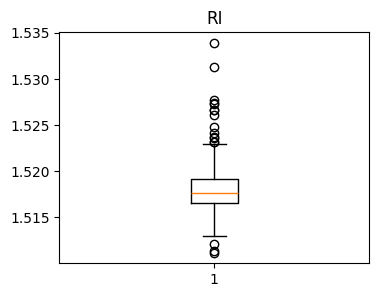

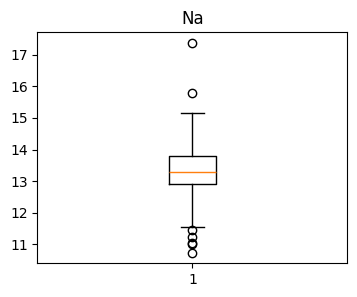

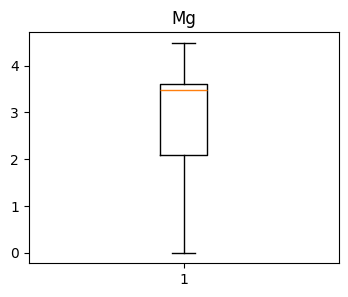

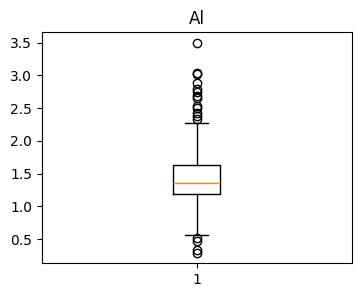

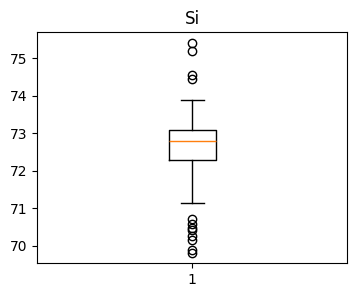

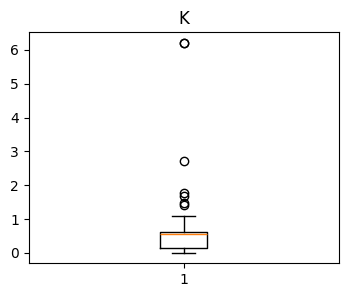

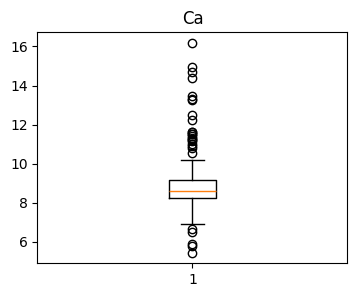

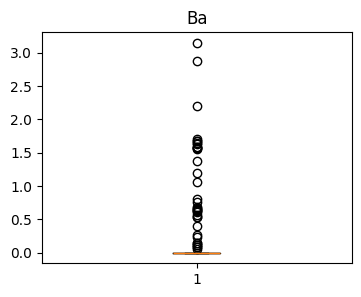

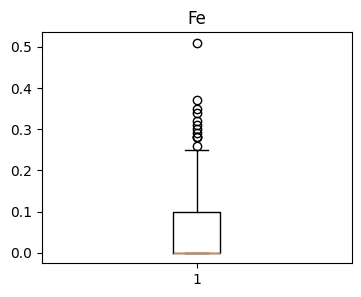

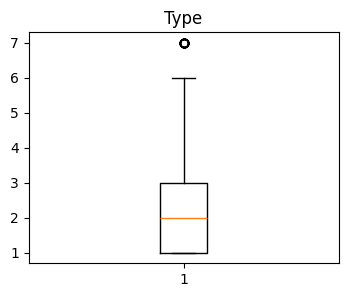

In [37]:
for i in columns:
  plt.figure(figsize=(4,3))
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()

# Data Visualization

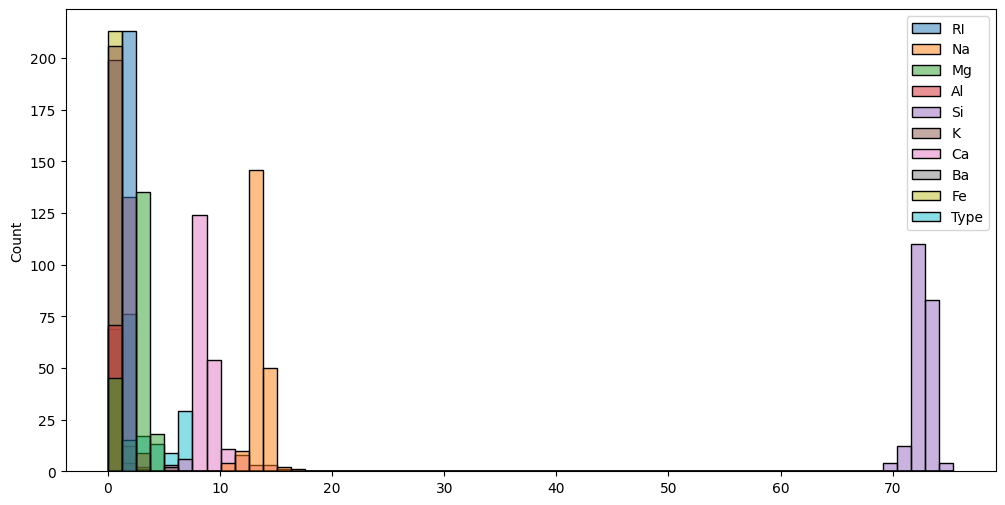

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(df)
plt.show()

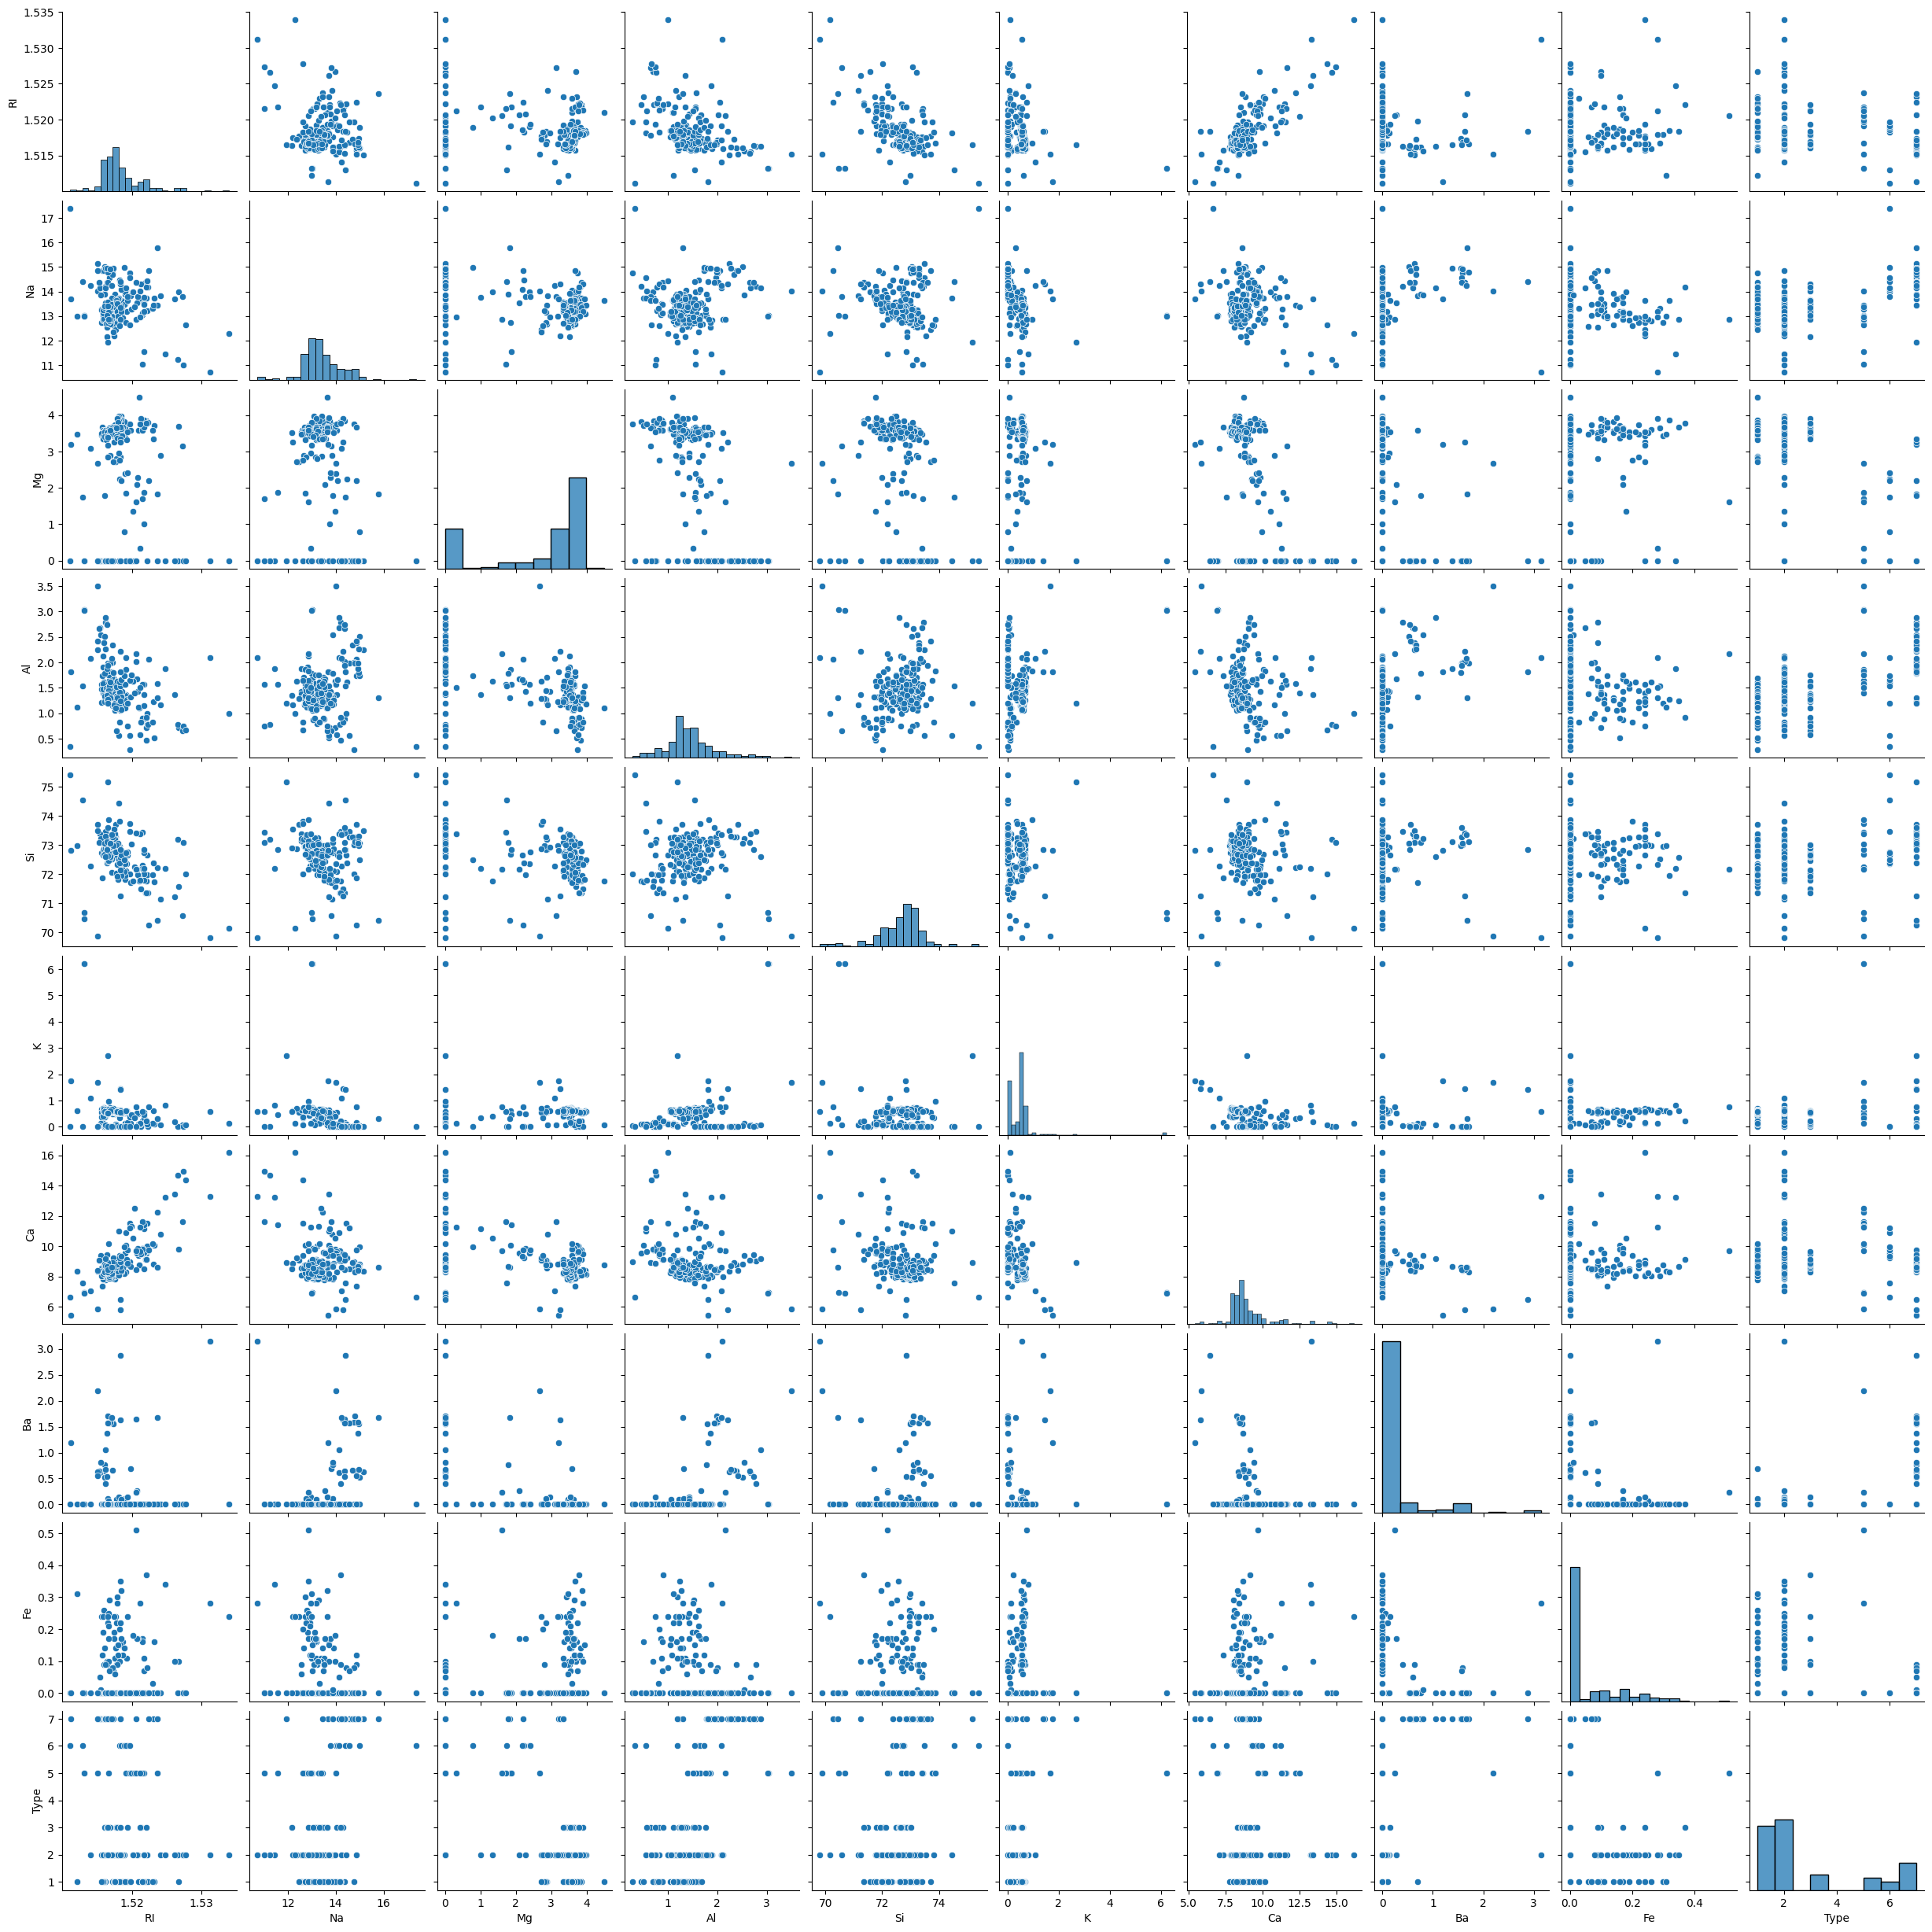

In [44]:
sns.pairplot(df)

<Axes: >

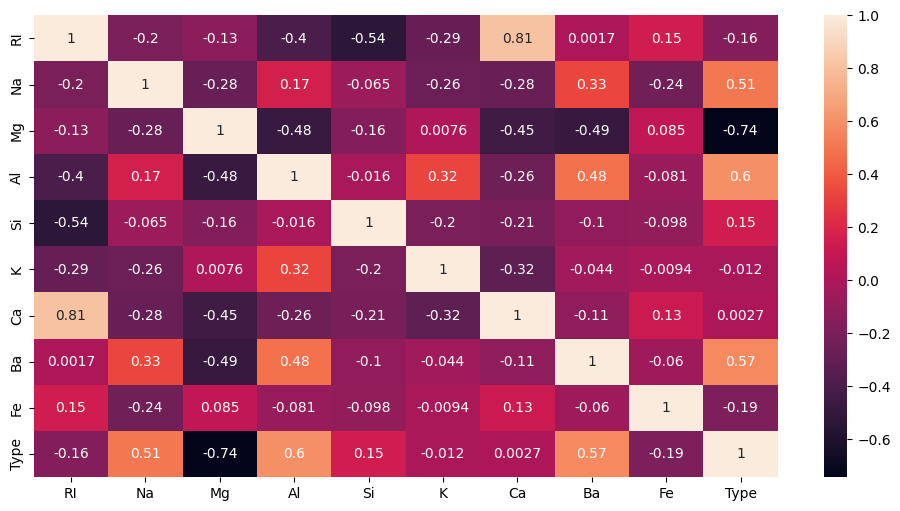

In [48]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot= True)

# Data Preprocessing

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)
df

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.35380764,
        -0.58830108, -0.85170346],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.35380764,
        -0.58830108, -0.85170346],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.35380764,
        -0.58830108, -0.85170346],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ...,  2.94550057,
        -0.58830108,  2.0051916 ],
       [-0.60735132,  1.19781989, -1.86017161, ...,  2.80467644,
        -0.58830108,  2.0051916 ],
       [-0.40905912,  1.01371278, -1.86017161, ...,  3.00585377,
        -0.58830108,  2.0051916 ]])

# Random Forest Model Implementation

In [51]:
df = pd.DataFrame(df)

In [52]:
df

,0,1,2,3,4,5,6,7,8,9
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301,-0.851703
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301,-0.851703
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301,-0.851703
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301,-0.851703
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301,-0.851703
...,...,...,...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301,2.005192
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301,2.005192
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301,2.005192
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301,2.005192


In [53]:
x = df.iloc[:,0:9]
y = df.iloc[:,9]

In [54]:
x

,0,1,2,3,4,5,6,7,8
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301


In [65]:
y = y.astype(int)

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [67]:
num_trees = 100
max_features = 3
rf_model = RandomForestClassifier(n_estimators=num_trees,max_features = max_features)
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [69]:
y_pred = rf_model.predict(x_test)

In [71]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred, average = 'weighted')
recall = recall_score(y_test,y_pred, average = 'weighted')
f1 = f1_score(y_test,y_pred, average = 'weighted')

In [73]:
print(accuracy)
print(precision)
print(recall)
print(f1)

0.9767441860465116
0.9774281805745555
0.9767441860465116
0.9752566073288046


# Bagging and Boosting Methods

In [75]:
# Bagging
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
num_trees = 100
bagging_model = BaggingClassifier(estimator=cart,n_estimators=num_trees,random_state=0)
bagging_model.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=0)

In [77]:
y_pred_bg = bagging_model.predict(x_test)

In [78]:
accuracy_bg = accuracy_score(y_test,y_pred_bg)
precision_bg = precision_score(y_test,y_pred_bg, average = 'weighted')
recall_bg = recall_score(y_test,y_pred_bg,average='weighted')
f1_bg = f1_score(y_test,y_pred_bg,average='weighted')

In [79]:
print(accuracy_bg)
print(precision_bg)
print(recall_bg)
print(f1_bg)

0.9767441860465116
0.9774281805745555
0.9767441860465116
0.9752566073288046


In [80]:
# Boosting
seeds = 7
model_bs = AdaBoostClassifier(n_estimators=num_trees,random_state=seeds)
model_bs.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=7)

In [81]:
y_pred_bs = model_bs.predict(x_test)

In [83]:
accuracy_bs = accuracy_score(y_test,y_pred_bs)
precision_bs = precision_score(y_test,y_pred_bs,average='weighted')
recall_bs = recall_score(y_test,y_pred_bs,average='weighted')
f1_bs = f1_score(y_test,y_pred_bs, average = 'weighted')

In [84]:
print(accuracy_bs)
print(precision_bs)
print(recall_bs)
print(f1_bs)

0.9302325581395349
0.9418604651162791
0.9302325581395349
0.9258028792912514


# 1. Explain Bagging and Boosting methods. How is it different from each other.
**Bagging (Bootstrap Aggregating)**
- Trains multiple models independently on different bootstrapped (randomly sampled with replacement) subsets of data.
- Reduces variance, preventing overfitting.
-Example: Random Forest (ensemble of decision trees).
-Parallel training.

**Boosting**
- Trains models sequentially, where each new model focuses on correcting the mistakes of the previous one.
-Reduces bias, improving accuracy on complex patterns.
-Example: AdaBoost, Gradient Boosting, XGBoost.
-Sequential training.

# 2. Explain how to handle imbalance in the data.
**1. Resampling Techniques**
* Oversampling (SMOTE): Increases minority class samples.
* Undersampling: Reduces majority class samples.

**2. Algorithm-Based Approaches**
* Use models that handle class imbalance well (e.g., Random Forest, XGBoost).
* Assign class weights to penalize misclassification of minority class (class_weight="balanced" in Sklearn).

**3. Evaluation Metrics (Instead of Accuracy)**
* Precision, Recall, F1-score, ROC-AUC to properly evaluate performance.

**4. Synthetic Data Generation**
* SMOTE (Synthetic Minority Over-sampling Technique) generates synthetic minority class samples.